In [2]:
#Het lineare model:

In [1]:

from tumor_ODE import tumorODE
from matplotlib import pyplot as plt

testTumor = tumorODE(0,100, 1)

#Ts,Vs = testTumor.lineare_model(2)

#tumorODE.plot(Ts,Vs, "green", "lineare model")


In [4]:
#exp. model:

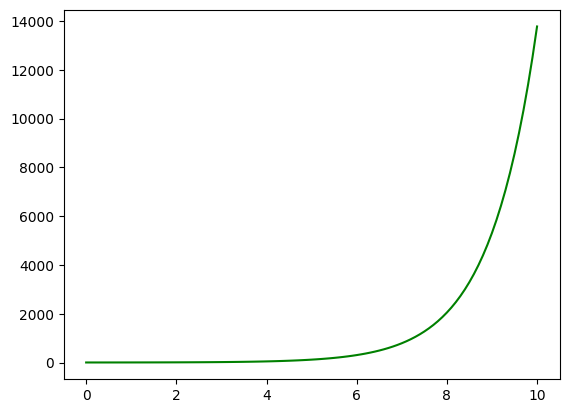

In [11]:
from ODE_modellen import tumorODE


testTumor = tumorODE(1,100, 0.1)

Ts,Vs = testTumor.exponentieel_model(1)

tumorODE.plot(Ts,Vs, "green", "exp. model")



In [6]:
# Mendelsohn groei: 

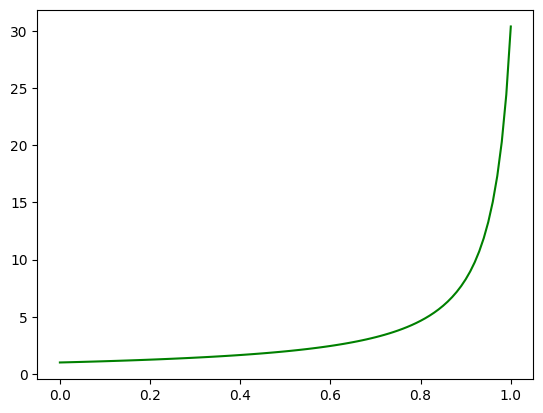

In [12]:
from ODE_modellen import tumorODE

testTumor = tumorODE(1,100, 0.01)

Ts,Vs = testTumor.mendelsohn_model(1,2)

tumorODE.plot(Ts,Vs, "green", "Mendelsohn groei")


In [8]:
# linear gelimiteerde groei:

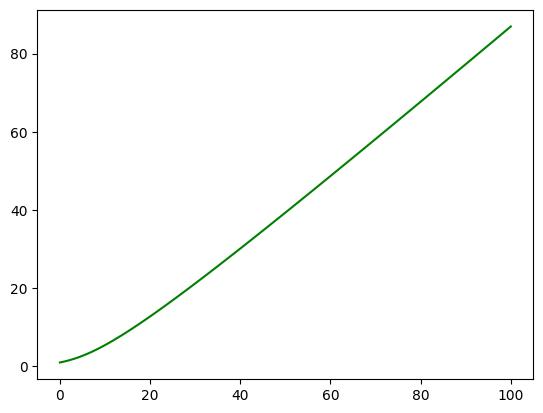

In [8]:
from ODE_modellen import tumorODE


testTumor = tumorODE(1,100, 1)

Ts,Vs = testTumor.linear_gelimiteerdegroei_model(1,3)

tumorODE.plot(Ts,Vs, "green", "linear gelimiteerde groei")

In [ ]:
# C

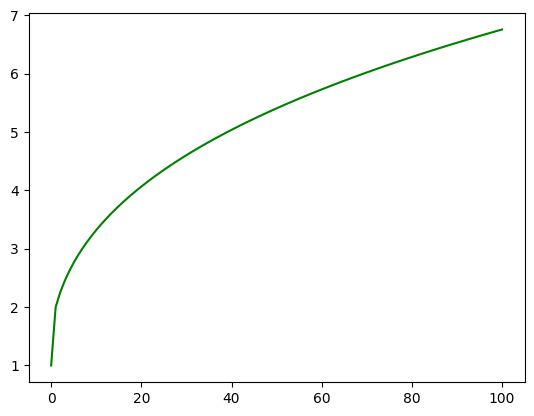

In [7]:
from ODE_modellen import tumorODE


testTumor = tumorODE(1,100, 1)

Ts,Vs = testTumor.oppervlak_gelimiteerdegroei_model(1,3)

tumorODE.plot(Ts,Vs, "green", "exponentieel afvlakkendegroei model")

In [12]:
# exponentieel afvlakkendegroei model:

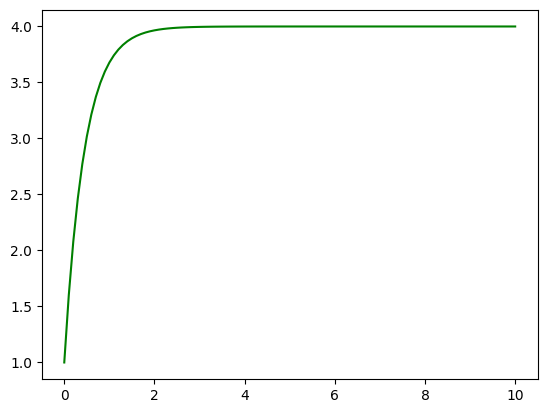

In [5]:
from ODE_modellen import tumorODE

# Met een tijdsstapgrootte van 1 oscilleert het heel erg.
testTumor = tumorODE(1,100, 0.1)

Ts,Vs = testTumor.exponentieel_afvlakkendegroei_model(2,4)

tumorODE.plot(Ts,Vs,"green", "exponentieel afvlakkendegroei model")

In [14]:
# von_bertalanffy_model

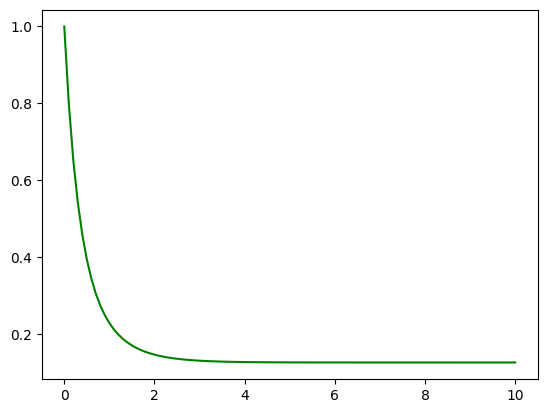

In [ ]:
from ODE_modellen import tumorODE

# Werkt niet met tijdsstap van 1...
testTumor = tumorODE(1,100, 0.1)

Ts,Vs = testTumor.von_bertalanffy_model(2,4)

tumorODE.plot(Ts,Vs,"green", "von bertalanffy model")

In [16]:
# allee_effect_groei

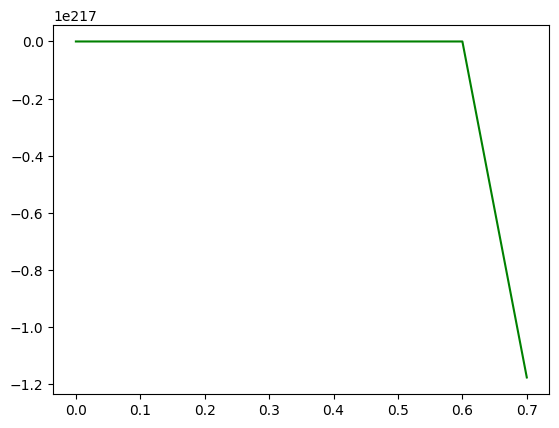

In [2]:
from ODE_modellen import tumorODE


testTumor = tumorODE(10,1000, 0.1)

Ts,Vs = testTumor.allee_effect_groei(10,1,300)

tumorODE.plot(Ts,Vs, "green", "Alee effect")

In [18]:
# gompertz_groei:

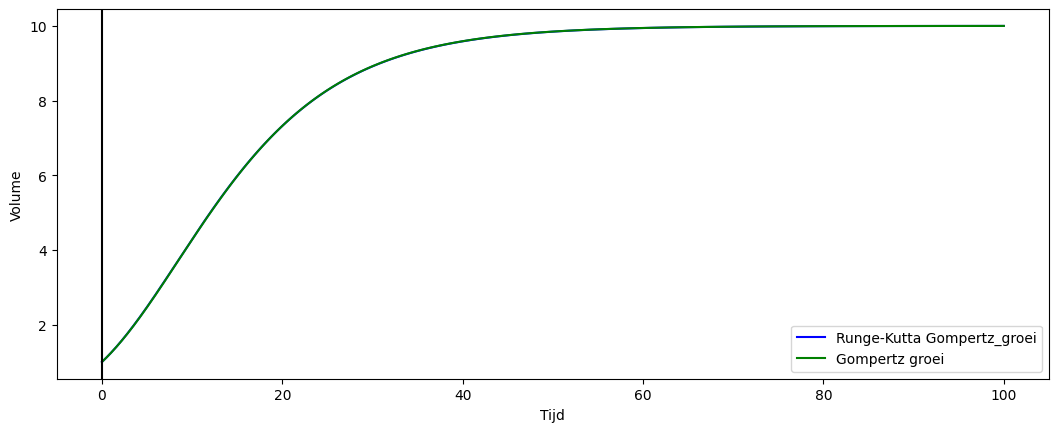

In [13]:
from ODE_modellen import tumorODE

testmodel = tumorODE(1, 1000, 0.1)


Ts, Vs = testmodel.solve("Runge-Kutta", testmodel.gompertz_groei(0.1, 10, "equation"))
tumorODE.plot(Ts,Vs, "blue", "Runge-Kutta Gompertz_groei")


Ts, Vs = testmodel.gompertz_groei(0.1,10)
tumorODE.plot(Ts,Vs, "green", "Gompertz groei")

tumorODE.show_plot()


In [21]:
# Kleine testdataset van: [S.S. Hassan & H.M. Al-Saedi, 2024](https://doi.org/10.1051/bioconf/20249700118)
Ts = [0, 13, 20, 32, 42, 55, 65, 75, 85, 88, 95, 98, 107, 115, 120]
Vs = [250, 255, 550, 575, 576, 800, 1050, 1250, 1750, 2000, 2550, 2750, 3000, 3500, 4000]

modeler = tumorODE(volume=Ts[0], delta_t=1, n=120)

Model ,MSE ,AIC
lineaire_model, 208135.645, 185.689
exponentieel_model, 4184995.067, 230.705
mendelsohn_model, 39628.951, 162.810
logistisch_model, 4184995.067, 232.705
gompertz_model, 4184995.067, 232.705
von_bertalanffy_model, 4184995.067, 232.705
exponentieel_afvlakkend_model, 209252.523, 187.769
lineair_gelimiteerd_model, 4184995.067, 232.705
Beste model: mendelsohn_model
Optimale parameters: {'c': 1.018148461303884, 'd': 0.5036471392961981}
Beste model: mendelsohn_model


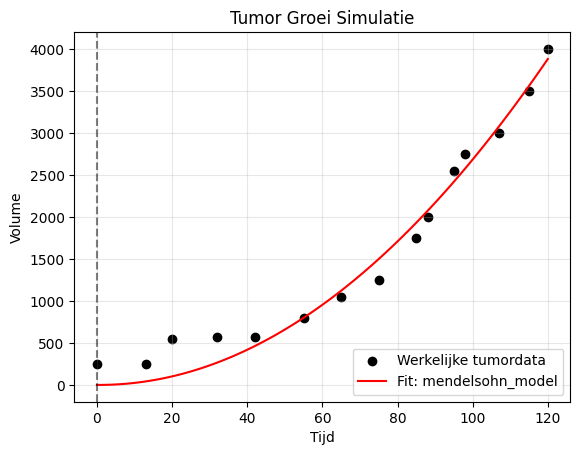

In [22]:
modellen_lijst = [
    (modeler.lineaire_model, {"c": 10}),
    (modeler.exponentieel_model, {"c": 0.1}),
    (modeler.mendelsohn_model, {"c": 0, "d": 0}),
    (modeler.logistisch_model, {"c": 0.2, "V_max": 800}),
    (modeler.gompertz_model, {"c": 0.2, "V_max": 800}),
    (modeler.von_bertalanffy_model, {"c": 0.5, "d": 0.1}),
    (modeler.exponentieel_afvlakkend_model, {"c": 0.1, "V_max": 800}),
    (modeler.lineair_gelimiteerd_model, {"c": 100, "d": 500}),
]

print(f"Model ,MSE ,AIC")

resultaten = []
for model_func, start_params in modellen_lijst:
        res = modeler.fit_and_evaluate(model_func, start_params, Ts, Vs)
        resultaten.append(res)
        print(f"{res["model_naam"]}, {res["mse"]:.3f}, {res["AIC"]:.3f}")


resultaten.sort(key=lambda x: x["AIC"])
beste_resultaat = resultaten[0]


print(f"Beste model: {beste_resultaat["model_naam"]}")
print(f"Optimale parameters: {beste_resultaat["best_params"]}")
print(f"Beste model: {beste_resultaat["model_naam"]}")

plt.scatter(Ts, Vs, color="black", label="Werkelijke tumordata")


beste_func = beste_resultaat["functie"]
beste_params = beste_resultaat["best_params"]
ts, vs = beste_func(**beste_params)

modeler.plot(ts, vs, color="red", label=f"Fit: {beste_resultaat['model_naam']}")

modeler.show_plot()

In [ ]:
print(beste_resultaat["model_naam"])
print(beste_resultaat["best_params"])
print()

print(f"{beste_resultaat["BIC"]:.3f}")
print(f"{beste_resultaat["AIC"]:.3f}")
print(f"{beste_resultaat["AICc"]:.3f}")


mendelsohn_model
{'c': 1.018148461303884, 'd': 0.5036471392961981}

164.226
162.810
163.810
